In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import wrangle as w
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
# loading zillow dataset 
test,validate,train = w.wrangle_zillow()

In [3]:
# listing column names 
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'year_built', 'property_value',
       'taxamount', 'fips'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280066 entries, 1375137 to 51867
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bedrooms        280066 non-null  float64
 1   bathrooms       280066 non-null  float64
 2   area            280066 non-null  float64
 3   year_built      280066 non-null  float64
 4   property_value  280066 non-null  float64
 5   taxamount       280066 non-null  float64
 6   fips            280066 non-null  float64
dtypes: float64(7)
memory usage: 17.1 MB


In [8]:
# defining X and Y variables for linear regression model
X_train = train[['area']]
y_train = train['property_value']

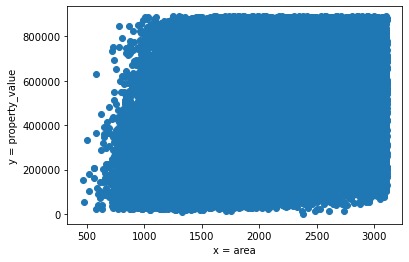

In [9]:
# look at scatter of x vs y
plt.scatter(train.area, train.property_value)

plt.xlabel('x = area')
plt.ylabel('y = property_value')
plt.show()

In [10]:
# fitting X and y to linear regression model 
model = LinearRegression()

In [11]:
# double brackets changes x (train[area] into a data frame to fit model)
model.fit(X_train,y_train)

LinearRegression()

In [14]:
#generating predictions from X 
train['yhat'] = model.predict(X_train)

In [15]:
# updated dataframe with yhat
train

,bedrooms,bathrooms,area,year_built,property_value,taxamount,fips,yhat
1375137,3.0,2.0,1580.0,1959.0,148054.0,2227.03,6037.0,317304.616496
1771275,3.0,2.0,1656.0,1961.0,166220.0,2013.70,6111.0,328165.110283
42892,4.0,3.0,2307.0,1984.0,501897.0,6008.36,6037.0,421193.813649
939219,2.0,2.0,2073.0,1952.0,292877.0,4173.94,6037.0,387754.924882
743889,4.0,3.0,2438.0,1979.0,345427.0,4324.74,6037.0,439913.875310
...,...,...,...,...,...,...,...,...
1615633,3.0,2.0,1229.0,1984.0,129868.0,2438.31,6037.0,267146.283345
110276,3.0,2.5,2008.0,1979.0,282573.0,3544.58,6059.0,378466.344669
78611,4.0,2.0,1657.0,1962.0,65191.0,1037.97,6037.0,328308.011518
1667968,4.0,2.0,1917.0,1964.0,414523.0,4629.76,6059.0,365462.332370


In [16]:
# Create the residuals for linear regression model 
# actual - prediction for residual
train['residual'] = train.property_value - train.yhat

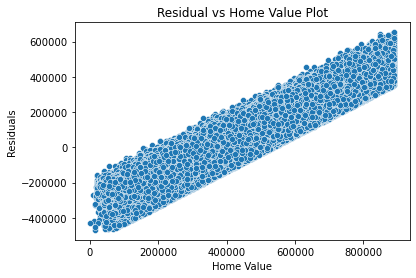

In [20]:
# create scatter plot to display residuals for the linear regression model
# x should be property value
sns.scatterplot(data=train, x='property_value', y='residual')

plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()



In [71]:
# sum of squared errors SSE 
SSE = sum(train['residual']**2)
SSE

9368250313166904.0

In [108]:
# explained sum of squares ESS for model
ESS = sum((train.yhat - train.property_value.mean())**2)
ESS

1292777709601996.5

In [73]:
# Calculate total sum of squares for model 
TSS = ESS + SSE
TSS

1.06610280227689e+16

In [74]:
# calculate mean squared error for model
MSE = SSE/len(train)
MSE

33450152154.016926

In [75]:
# calculate root mean squared error for model
RMSE = sqrt(MSE)
RMSE

182893.8275448817

In [76]:
# Create baseline model with mean of target variable (property value)
train['yhat_baseline'] = train.property_value.mean()
train

,bedrooms,bathrooms,area,year_built,property_value,taxamount,fips,yhat,residual,yhat_baseline,residual_baseline
1375137,3.0,2.0,1580.0,1959.0,148054.0,2227.03,6037.0,317304.616496,-169250.616496,341923.816886,-193869.816886
1771275,3.0,2.0,1656.0,1961.0,166220.0,2013.70,6111.0,328165.110283,-161945.110283,341923.816886,-175703.816886
42892,4.0,3.0,2307.0,1984.0,501897.0,6008.36,6037.0,421193.813649,80703.186351,341923.816886,159973.183114
939219,2.0,2.0,2073.0,1952.0,292877.0,4173.94,6037.0,387754.924882,-94877.924882,341923.816886,-49046.816886
743889,4.0,3.0,2438.0,1979.0,345427.0,4324.74,6037.0,439913.875310,-94486.875310,341923.816886,3503.183114
...,...,...,...,...,...,...,...,...,...,...,...
1615633,3.0,2.0,1229.0,1984.0,129868.0,2438.31,6037.0,267146.283345,-137278.283345,341923.816886,-212055.816886
110276,3.0,2.5,2008.0,1979.0,282573.0,3544.58,6059.0,378466.344669,-95893.344669,341923.816886,-59350.816886
78611,4.0,2.0,1657.0,1962.0,65191.0,1037.97,6037.0,328308.011518,-263117.011518,341923.816886,-276732.816886
1667968,4.0,2.0,1917.0,1964.0,414523.0,4629.76,6059.0,365462.332370,49060.667630,341923.816886,72599.183114


In [77]:
# create residuals for baseline model 
train['residual_baseline'] = train.property_value - train.yhat_baseline
train


,bedrooms,bathrooms,area,year_built,property_value,taxamount,fips,yhat,residual,yhat_baseline,residual_baseline
1375137,3.0,2.0,1580.0,1959.0,148054.0,2227.03,6037.0,317304.616496,-169250.616496,341923.816886,-193869.816886
1771275,3.0,2.0,1656.0,1961.0,166220.0,2013.70,6111.0,328165.110283,-161945.110283,341923.816886,-175703.816886
42892,4.0,3.0,2307.0,1984.0,501897.0,6008.36,6037.0,421193.813649,80703.186351,341923.816886,159973.183114
939219,2.0,2.0,2073.0,1952.0,292877.0,4173.94,6037.0,387754.924882,-94877.924882,341923.816886,-49046.816886
743889,4.0,3.0,2438.0,1979.0,345427.0,4324.74,6037.0,439913.875310,-94486.875310,341923.816886,3503.183114
...,...,...,...,...,...,...,...,...,...,...,...
1615633,3.0,2.0,1229.0,1984.0,129868.0,2438.31,6037.0,267146.283345,-137278.283345,341923.816886,-212055.816886
110276,3.0,2.5,2008.0,1979.0,282573.0,3544.58,6059.0,378466.344669,-95893.344669,341923.816886,-59350.816886
78611,4.0,2.0,1657.0,1962.0,65191.0,1037.97,6037.0,328308.011518,-263117.011518,341923.816886,-276732.816886
1667968,4.0,2.0,1917.0,1964.0,414523.0,4629.76,6059.0,365462.332370,49060.667630,341923.816886,72599.183114


In [78]:
# calculate sum of squared errors for baseline model
SSE_baseline = sum(train['residual_baseline']**2)
SSE_baseline

1.066102802276947e+16

In [81]:
# calculate mean squared error  for baseline model
MSE_baseline = SSE_baseline/len(train)
MSE_baseline

38066127351.30102

In [82]:
# calculate root mean squared error for baseline model
RMSE_baseline = sqrt(MSE_baseline)
RMSE_baseline

195105.42624771106

In [88]:
# compare the sum of squared errors between model and baseline model 
print("Sum of Squared error Model:",{SSE})
print("Sum of Squared error Baseline Model:",{SSE_baseline})


Sum of Squared error Model: {9368250313166904.0}
Sum of Squared error Baseline Model: {1.066102802276947e+16}


In [97]:
# funcion to determine best model 
def choose_best_model(y,yhat):
    if SSE > SSE_baseline:
        print('Baseline model outperforms my model')
    else:
        print('My model outperforms baseline model')


In [98]:
choose_best_model(SSE,SSE_baseline)

My model outperforms baseline model


In [91]:
# what is the amount of variance explained in model
#use r2_score
r2_score(train.property_value, train.yhat)


0.12126201214753829

In [92]:
#use r2_score
r2_score(train.property_value, train.yhat_baseline)

0.0

In [ ]:
# Is your model better than the baseline model 

My model is better, I have a lower RSME

In [103]:
# create functions for evaluate.py
def plot_residuals(df,y,yhat):
    '''This function will plot the residual plot'''
    plt.plot(df['y'], train['yhat'], 'o')
    
def regression_errors(y,yhat):
    '''returns the sum of squared errors, explained sum of squares, 
    total sum of squares, mean squared error, root mean squared error'''
    
    #calculate mean squared error 
    MSE = mean_squared_error(y, yhat)
    print("Mean Squared Error:",{MSE})
    
    #calculates sum of squared errors
    SSE = MSE*len(y)
    print("Sum of Squared errors:",{SSE}) 
    
    #calculate explained sum of squares 
    ESS = sum((yhat - y.mean()**2).sum()
    print("Explained Sum of Squares:",{ESS}) 
    
    #calculate total sum of squares 
    TSS = ESS + SSE
    print("Total Sum of Squares:",{TSS})
    
    #calculate root mean squared error 
    RMSE = sqrt(MSE)
    print("Root Mean Squared Error:",{RMSE})
        
def baseline_mean_errors(y):
    '''returns the sum of squared errors, explained sum of squares, 
    total sum of squares, mean squared error, root mean squared error
    for baseline model'''
    
    #calculates sum of squared errors
    baseline = np.repeat(y.mean(), len(y))
    print("Sum of Squared errors for Baseline model:",{SSE})
        
    #calculate mean squared error 
    MSE_baseline = mean_squared_error(y, baseline)
    print("Mean Squared Error for Baseline model:",{MSE})
    
    #calculates sum of squared errors
    SSE_baseline = MSE_baseline*len(y)
    print("Sum of Squared errors:",{SSE}) 
              
    #calculate root mean squared error
    RMSE_baseline = MSE**.5 
    print("Root Mean Squared Error for Baseline model:",{RMSE_baseline})

def better_than_baseline(y,yhat):
    '''this function will determine which model is better
        based on the value of SSE'''
    if SSE > SSE_baseline:
        print('False')
    else:
        print('True')